# ODE solvers in `scipy.integrate`
The `scipy` package contains a number of ode solvers that act much like analogous functions in MATLAB. They include:

- `OdeSolution`: Continuous ODE solution.
- `odeint`: (*deprecated, but it still works*) Integrate a system of ordinary differential equations.
- `solve_ivp`: Solve an initial value problem for a system of ODEs.

There are also a number of routines - functions that don't solve the equation for you, but act as 1 step in the solving process, much like the "homegrown" routines in `diffeq.py` that I have supplied

- `solve_ivp`: Solve an initial value problem for a system of ODEs.
- `RK23`: Explicit Runge-Kutta method of order 3(2).
- `RK45`:	Explicit Runge-Kutta method of order 5(4).
- `Radau`: Implicit Runge-Kutta method of Radau IIA family of order 5.
- `BDF`: Implicit method based on backward-differentiation formulas.
- `LSODA`: Adams/BDF method with automatic stiffness detection and switching.

And finally, there are some class methods, but they require a little too much set up for us.

- `OdeSolver`: Base class for ODE solvers.
- `DenseOutput`: Base class for local interpolant over step made by an ODE solver.

You should refer to the [scipy reference page](https://docs.scipy.org/doc/scipy/reference/integrate.html) for more details. Below are several examples of ode solvers using the equation, $$\frac{dy}{dx} +y = x,$$ where $y(0)=1$, as shown in [ode example](http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html).
This differential equation has an exact solution: $$y(x) = x-1+2e^{-x}$$

In [52]:
import scipy.integrate as scint
import numpy as np
import matplotlib.pyplot as pyplot
# define lambda function that returns dy/dx
func= lambda y,x: -y+x
# defining exact solution for comparison
yexact = lambda x: x-1+2*np.exp(-x)
# initial condition and "time" span
y0=1
xspan = np.linspace(0,5,100)

<class 'numpy.ndarray'>
[1.         0.95200333 0.90885793 0.87032489 0.83617706 0.80619844
 0.78018375 0.75793771 0.73927472 0.72401832 0.71200073 0.70306243
 0.69705177 0.69382455 0.69324371 0.69517889 0.69950615 0.70610771
 0.71487157 0.72569123 0.73846541 0.75309788 0.7694971  0.78757607
 0.80725205 0.82844638 0.8510843  0.87509469 0.90040998 0.92696587
 0.95470129 0.98355813 1.01348116 1.04441787 1.07631834 1.10913511
 1.14282303 1.17733922 1.21264287 1.2486952  1.28545935 1.32290024
 1.36098456 1.3996806  1.43895825 1.47878886 1.5191452  1.56000137
 1.60133275 1.64311595 1.68532871 1.72794986 1.77095931 1.81433792
 1.85806751 1.90213081 1.94651137 1.99119357 2.03616254 2.08140417
 2.12690503 2.17265235 2.21863399 2.26483841 2.31125464 2.35787225
 2.40468132 2.45167242 2.49883659 2.54616529 2.59365044 2.64128431
 2.6890596  2.73696933 2.78500688 2.83316595 2.88144057 2.92982504
 2.97831395 3.02690216 3.07558477 3.12435714 3.17321484 3.22215368
 3.27116966 3.32025897 3.36941801 3.41

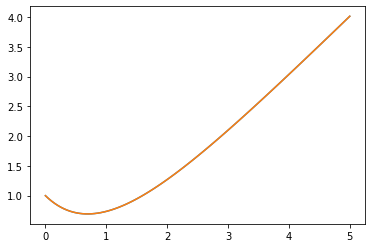

In [53]:
ysol1 = scint.odeint(func,y0,xspan)
print(type(ysol1))
ysol1 = np.ndarray.flatten(ysol1)
print(ysol1)
pyplot.plot(xspan,ysol1)
pyplot.plot(xspan,yexact(xspan))

Below is the difference between the numeric solution and the exact solution graphed on a semi-log plot. The error is small and varies along the interval.

Text(0.5, 0, 'x')

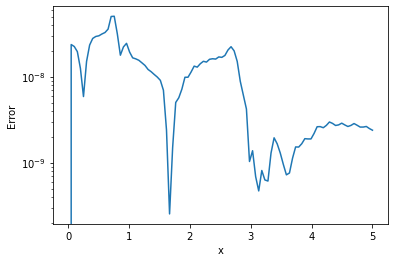

In [54]:
ydiff = np.abs(yexact(xspan) - ysol1)
pyplot.semilogy(xspan,ydiff)
pyplot.ylabel("Error")
pyplot.xlabel("x")

Using the other solvers involves similar syntax:
## solve_ivp

In [61]:
# note the order of arguments in the function is opposite of above
ysol2 = scint.solve_ivp(lambda x,y: -y+x,[0,5],[1])
type(ysol2)

scipy.integrate._ivp.ivp.OdeResult

In [56]:
ysol2.t

array([0.        , 0.08707246, 0.89912411, 1.66864823, 2.60007906,
       3.79023301, 5.        ])

In [57]:
ysol2.y

array([[1.        , 0.92029381, 0.7131988 , 1.04582535, 1.74879205,
        2.83567181, 4.01362209]])

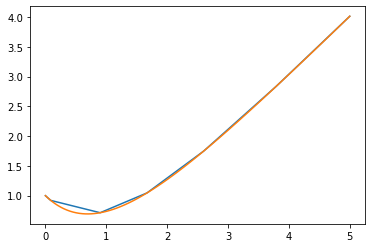

In [58]:
pyplot.plot(ysol2.t,ysol2.y[0])
pyplot.plot(xspan,yexact(xspan))

## RK45

In [64]:
# the last argument is initial step size
# takes lambda, x0, [y0], xf, step
ysol3 = scint.RK45(lambda x,y: -y+x,0,[1],5,0.1)
t_values = []
y_values = []
for i in range(100):
    # get solution step state
    ysol3.step()
    t_values.append(ysol3.t)
    y_values.append(ysol3.y[0])
    # break loop after modeling is finished
    if ysol3.status == 'finished':
        break

scipy.integrate._ivp.rk.RK45

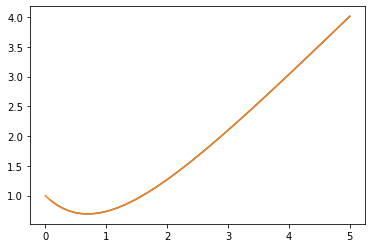

In [65]:
pyplot.plot(t_values,y_values)
pyplot.plot(xspan,yexact(xspan))
type(ysol3)

# Solving a system of differential equations: Predator-Prey model 
The Lotka-Volterra predator-prey model is a classic in mathematical ecology. Consider a simple ecosystem consisting of rabbits that have an infinite supply of food and foxes that prey on the rabbits. Their interaction is modeled by a pair of nonlinear, first-order equations:
$$\frac{dr}{dt} = \alpha r(t) - \beta r(t) f(t)$$

$$\frac{df}{dt} = \beta f(t)r(t) - \gamma f(t)$$
where $t$ is time, $r(t)$ is the number of rabbits, $f(t)$ is the number of foxes, $\alpha$ is related to the birthrate of rabbits, $\gamma$ is related to the death rate of foxes, and $\beta$ is the interaction rate of foxes with rabbits. The solution to this equations cannot be expressed in terms of known functions, so they must be solved numerically. We can do this using `scipy`.
Solving a system of differential equations is exactly like solving 1 differential equation, just twice. You have to feed the equations to `odeint` as an array

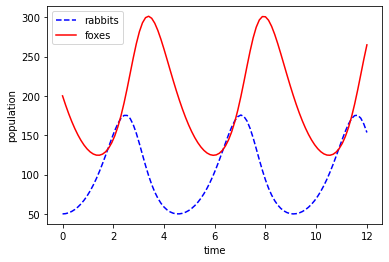

In [76]:
alpha, beta, gamma = 2,0.01,1

def dPdt(P, t):
    # dPdt takes a array of [rabbits,foxes] and returns [dr/dt,df/dt]
    # P = [rabbits,foxes]
    return [P[0]*(alpha - beta*P[1]), -P[1]*(gamma - beta*P[0])]
# define time steps
ts = np.linspace(0, 12, 100)
# define initial conditions
P0 = [50, 200]
# feed odeint function,initial conditions, time steps
Ps = scint.odeint(dPdt, P0, ts)
# pull out the respective columns for rabbits and foxes
rabbits = Ps[:,0]
foxes = Ps[:,1]

fig, ax = pyplot.subplots()
ax.plot(ts,rabbits,'b--',label="rabbits")
ax.plot(ts,foxes,'r',label="foxes")
pyplot.xlabel("time")
pyplot.ylabel("population")
pyplot.legend(loc="upper left")
pyplot.show()

One of the properties of the predator-prey model is it's periodicity, as illustrated in the phase plot below.

Text(0, 0.5, 'foxes')

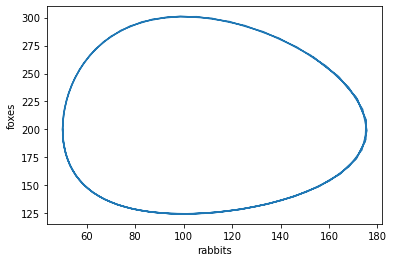

In [77]:
pyplot.plot(rabbits,foxes)
pyplot.xlabel("rabbits")
pyplot.ylabel("foxes")

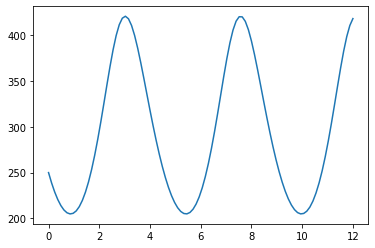

In [78]:
pyplot.plot(ts,rabbits+foxes)